In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
train_path = "/Users/sailaharimullapudi/Desktop/kneeKL224_test500/train"
test_path = "/Users/sailaharimullapudi/Desktop/kneeKL224_test500/test"
valid_path = "/Users/sailaharimullapudi/Desktop/kneeKL224_test500/val"
list_of_classes = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

import os
import pandas as pd

for d in [train_path, test_path, valid_path]:
    filepaths = []
    labels = [] 
    classlist = os.listdir(d)
    
    for klass in classlist:
        try:
            intklass = int(klass)
            label = list_of_classes[intklass]
            classpath = os.path.join(d, klass)
            flist = os.listdir(classpath)        
            
            for f in flist:
                fpath = os.path.join(classpath, f)
                filepaths.append(fpath)
                labels.append(label)
        
        except ValueError:
            # Skip directories that are not valid integers
            continue
    
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')        
    pdf = pd.concat([Fseries, Lseries], axis=1)
    
    if d == test_path:
        test_df = pdf
    elif d == valid_path:
        valid_df = pdf
    else:
        train_df = pdf

print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

# get the number of classes and the images count for each class in train_df
classes = sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups = train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist = []
classlist = []
for label in sorted(list(train_df['labels'].unique())):
    group = groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

# lets get the average height and width of a sample of the train images
ht = 0
wt = 0

train_df_sample = train_df.sample(n = 100, random_state = 123, axis = 0)
for i in range (len(train_df_sample)):
    fpath = train_df_sample['filepaths'].iloc[i]
    img = plt.imread(fpath)
    shape = img.shape
    ht += shape[0]
    wt += shape[1]

train_df lenght:  2173   test_df length:  1517   valid_df length:  826
The number of classes in the dataset is:  5
            CLASS               IMAGE COUNT 
           Doubtful                 500     
           Healthy                  500     
           Minimal                  500     
           Moderate                 500     
            Severe                  173     


In [3]:
classes = sorted(list(test_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups = test_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist = []
classlist = []
for label in sorted(list(test_df['labels'].unique())):
    group = groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

The number of classes in the dataset is:  5
            CLASS               IMAGE COUNT 
           Doubtful                 296     
           Healthy                  500     
           Minimal                  447     
           Moderate                 223     
            Severe                  51      


In [4]:
# image size - avg hight and width
average_height = ht // 100
average_width = wt // 100
image_size = (average_height, average_width)

# preprocess images
def preprocess(filepaths):
    images = []
    for filepath in filepaths:
        img = plt.imread(filepath)
        img = resize(img, image_size, anti_aliasing=True)
        img_flat = img.flatten()
        images.append(img_flat)
    return images

In [5]:
train_images = preprocess(train_df['filepaths'])
test_images = preprocess(test_df['filepaths'])
valid_images = preprocess(valid_df['filepaths'])

In [6]:
# label encoding 
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['labels'])
test_labels = label_encoder.transform(test_df['labels'])
valid_labels = label_encoder.transform(valid_df['labels'])

print(train_labels)

[1 1 1 ... 2 2 2]


In [7]:
# svm = SVC(kernel = 'linear', probability=True, decision_function_shape='ovr', C = 1.0)
# svm.fit(train_images, train_labels)

In [8]:
# test_predictions = svm.predict(test_images)
# accuracy = accuracy_score(test_labels, test_predictions)
# report = classification_report(test_labels, test_predictions, target_names = list_of_classes)

# import pandas as pd

# data_labels = pd.DataFrame(
#     {'data': test_labels,
#      'prediction': test_predictions
#     })


# res = pd.merge(test_df, data_labels, left_index=True, right_index=True)

# cond1 = res.data == 0
# cond2 = res.prediction == 1

# final_res = res.query('data == 1 & prediction == 0')
# final_res.to_csv('results.csv', index=False)  

# print(f"Accuracy: {accuracy}")
# print("Classification Report:\n", report)

In [9]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import GridSearchCV

# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
# X_train_resampled, y_train_resampled = smote.fit_resample(train_images, train_labels)

# parameters = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']}
# svm_model = SVC()
# grid_search = GridSearchCV(svm_model, parameters, cv=5, scoring='accuracy')
# grid_search.fit(X_train_resampled, y_train_resampled)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
# best_svm_model.fit(X_train_resampled, y_train_resampled)

# test_predictions = best_svm_model.predict(test_images)

# accuracy = accuracy_score(test_labels, test_predictions)
# conf_matrix = confusion_matrix(test_labels, test_predictions)
# classification_rep = classification_report(test_labels, test_predictions)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", classification_rep)

In [10]:
from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import GridSearchCV

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(train_images, train_labels)

# parameters = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']}
# svm_model = SVC()
# grid_search = GridSearchCV(svm_model, parameters, cv=5, scoring='accuracy')
# grid_search.fit(X_train_resampled, y_train_resampled)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

svm = SVC(kernel = 'linear', probability=True, decision_function_shape='ovr', C = 0.1)
svm.fit(X_train_resampled, y_train_resampled)

test_predictions = svm.predict(test_images)

accuracy = accuracy_score(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)
classification_rep = classification_report(test_labels, test_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.3375082399472643
Confusion Matrix:
 [[ 88  83  47  77   1]
 [150 191  65  79  15]
 [109  75 100 153  10]
 [ 32  21  45 103  22]
 [  1   1   4  15  30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.30      0.26       296
           1       0.51      0.38      0.44       500
           2       0.38      0.22      0.28       447
           3       0.24      0.46      0.32       223
           4       0.38      0.59      0.47        51

    accuracy                           0.34      1517
   macro avg       0.35      0.39      0.35      1517
weighted avg       0.38      0.34      0.34      1517



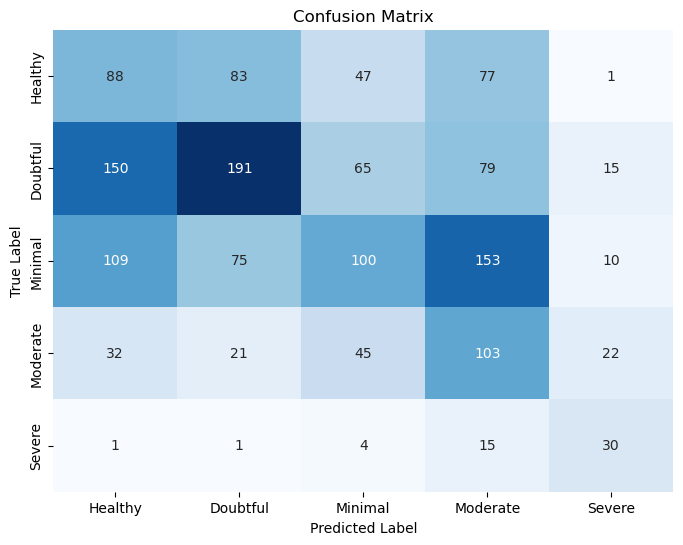

In [11]:
matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap = "Blues", fmt="d", cbar=False,
            xticklabels=list_of_classes, yticklabels=list_of_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

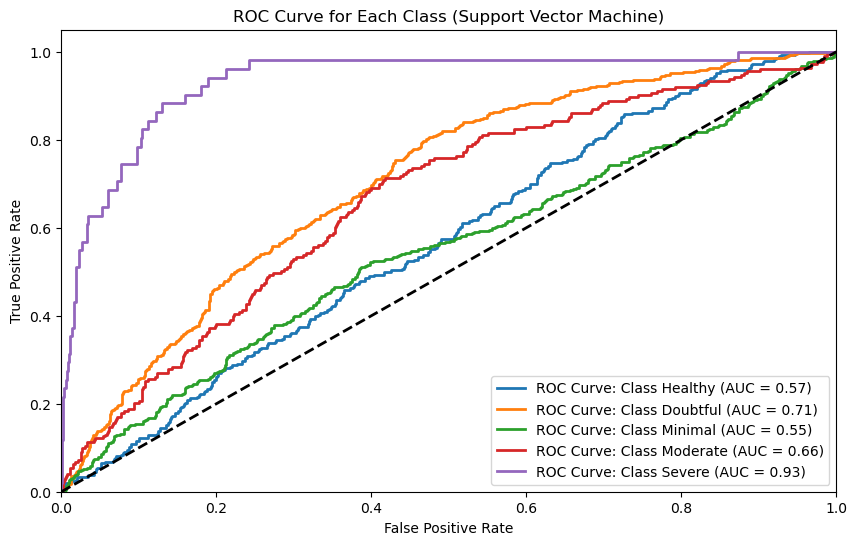

In [12]:
decision_function = svm.decision_function(test_images)
train_labels_binary = label_binarize(test_labels, classes=np.unique(train_labels))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(train_labels))):
    fpr[i], tpr[i], _ = roc_curve(train_labels_binary[:, i], decision_function[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(train_labels))):
    x = ""
    if i == 0:
        x = "Healthy"
    elif i == 1:
        x = "Doubtful"
    elif i == 2:
        x = "Minimal"
    elif i == 3:
        x = "Moderate"
    else:
        x = "Severe"
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC Curve: Class {} (AUC = {:.2f})'.format(x, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class (Support Vector Machine)')
plt.legend(loc='lower right')
plt.show()